<a href="https://colab.research.google.com/github/NarasimhaMurthy2003/FakeNewsDetection/blob/main/DetectingFakeNewsWithMachineLearningAndFeatureLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
uploaded=files.upload()

Saving cleanedDataset.csv to cleanedDataset (1).csv


In [ ]:
df=pd.read_csv("cleanedDataset.csv")

In [ ]:
df.head()

,Unnamed: 0,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
title_counter= Counter()
text_counter=Counter()

In [ ]:
for index, row in df.iterrows():
  title_words=word_tokenize(row["title"])
  text_words=word_tokenize(row["text"])

  title_words=[word.lower() for word in title_words if word.isalpha() and word.lower() not in stop_words ]
  text_words=[word.lower() for word in text_words if word.isalpha() and word.lower() not in stop_words ]

  if row["label"]== "Fake":
    title_counter.update(title_words)
    text_counter.update(text_words)


In [ ]:
top_keywords_title=title_counter.most_common(20)
top_keywords_text=text_counter.most_common(20)

In [ ]:
print("Top 20 key words Associate with Fake News Title:")
for keyword,count in top_keywords_title:
  print(f"{keyword}:{count} times")
print("Top 20 key words Associate with Fake News Text:")
for keyword,count in top_keywords_text:
  print(f"{keyword}:{count} times")


Top 20 key words Associate with Fake News Title:
trump:135 times
hillary:129 times
clinton:121 times
title:91 times
us:59 times
le:57 times
election:53 times
gorafi:52 times
life:47 times
news:44 times
donald:40 times
new:39 times
comment:38 times
video:37 times
clintons:31 times
wikileaks:30 times
war:30 times
de:30 times
obama:29 times
fbi:27 times
Top 20 key words Associate with Fake News Text:
clinton:1990 times
trump:1975 times
one:1419 times
us:1385 times
said:1353 times
would:1345 times
hillary:1272 times
people:1263 times
also:1075 times
like:1011 times
new:899 times
election:894 times
time:849 times
even:802 times
state:756 times
could:722 times
get:703 times
campaign:677 times
president:655 times
many:653 times


News Title And Text Length Analysis


In [ ]:
df["title_length"] = df["title"].apply(len)
df["text_length"] = df["text"].apply(len)

In [ ]:
real_news = df[df["label"]=="Real"]
fake_news = df[df["label"]=="Fake"]

In [ ]:
avg_real_title_length = real_news["title_length"].mean()
avg_fake_title_length = fake_news["title_length"].mean()
avg_real_text_length = real_news["text_length"].mean()
avg_fake_text_length = fake_news["text_length"].mean()

In [ ]:
print(f"Average Title Length for Real News: {avg_real_title_length:.2f} characters")
print(f"Average Title Length for Fake News: {avg_fake_title_length:.2f} characters")
print(f"Average Text Length for Real News: {avg_real_text_length:.2f} characters")
print(f"Average Text Length for Fake News: {avg_fake_text_length:.2f} characters")

Average Title Length for Real News: 56.67 characters
Average Title Length for Fake News: 65.07 characters
Average Text Length for Real News: 3209.14 characters
Average Text Length for Fake News: 2843.22 characters


In [ ]:
import matplotlib.pyplot as plt
labels = ["Real News Title","Fake News Title","Real Text","Fake Text"]
lengths = [avg_real_title_length, avg_fake_title_length, avg_real_text_length,avg_fake_text_length ]

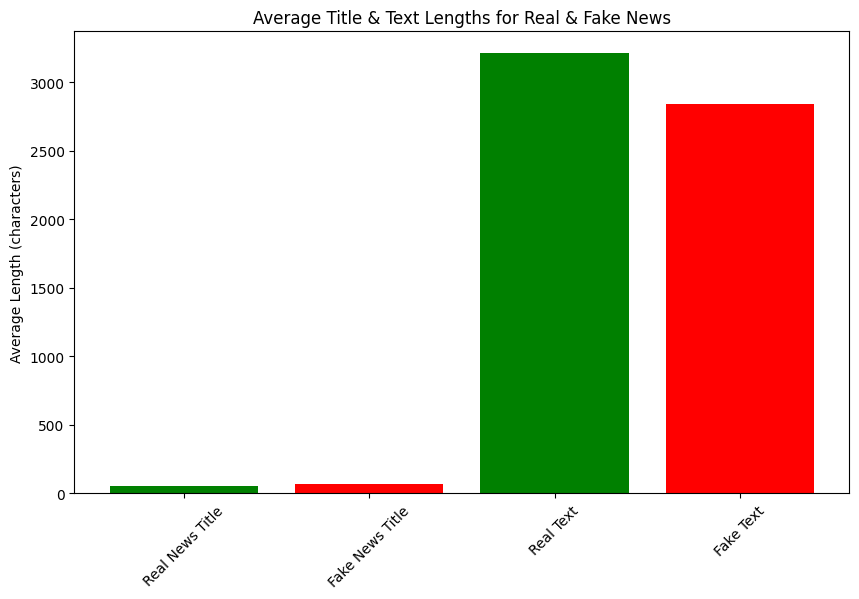

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(labels,lengths,color=["green","red","green","red"])
plt.title("Average Title & Text Lengths for Real & Fake News")
plt.ylabel("Average Length (characters)")
plt.xticks(rotation=45)
plt.show()

Detecting Sensationalism in Fake News


In [ ]:
from scipy.stats import chi2_contingency
import re

In [ ]:
def detect_sensationalism(text):
    sensational_keywords = ["shocking", "outrageous", "unbelievable", "mind-blowing", "explosive"]

    for keyword in sensational_keywords:
        if re.search(r'\b' + keyword + r'\b', text, re.IGNORECASE):
            return True
    return False

In [ ]:
df["Sensationalism"] = df["text"].apply(detect_sensationalism)

In [ ]:
contigency_table = pd.crosstab(df["Sensationalism"],df["label"])
print(contigency_table)

label           Fake  Real
Sensationalism            
False           1205   723
True              76    31


In [ ]:
chi2,p,_,_ = chi2_contingency(contigency_table)

In [ ]:
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 2.805991856109019
P-value: 0.09391274824954887


In [ ]:
alpha = 0.05
if p < alpha:
  print("There is a significant association between sensationalism and credibility of the news")
else:
  print("There is not significant association between sensationalism and credibility of the news")

There is not significant association between sensationalism and credibility of the news


Analyzing Emotion in Fake News with NLP

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def analyze_sentiment(text):
  sentiment_score = analyzer.polarity_scores(text)
  if sentiment_score["compound"] >= 0.05:
    return "Positive"
  elif sentiment_score["compound"] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [ ]:
df["Sentiment"] = df["text"].apply(analyze_sentiment)

In [ ]:
print(df[['text','Sentiment']].head())

                                                text Sentiment
0  print they should pay all the back all the mon...  Positive
1  why did attorney general loretta lynch plead t...  Negative
2  red state  \nfox news sunday reported this mor...  Positive
3  email kayla mueller was a prisoner and torture...  Positive
4  email healthcare reform to make america great ...  Positive


Detecting Fake News with Feature Engineering

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
fake_news_data = df[df['label'] == "Fake"]
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(fake_news_data["text"])
word_frequencies = X.toarray().sum(axis=0)
feature_names = vectorizer.get_feature_names_out()
keywords = [feature_names[i] for i in word_frequencies.argsort()[-10:][::-1]]
print(keywords)

['clinton', 'trump', 'said', 'hillary', 'people', 'like', 'just', 'new', 'election', 'time']


In [ ]:
site_counts = df["site_url"].value_counts()
fake_site_counts = df[df["label"]=="Fake"]["site_url"].value_counts()
fake_news_percentage = fake_site_counts / site_counts

In [ ]:
def fakenewspredictionFeatureEnginnering(title, news_source):
  title_contains_keyword = any(keyword in title.lower() for keyword in keywords)
  if news_source in fake_news_percentage:
    source_fake_percentage = fake_news_percentage[news_source]
  else:
    source_fake_percentage = 0.0

  if title_contains_keyword and source_fake_percentage > 0.5:
    return "Fake News"
  else:
    return "Real News"

In [ ]:
text_input = "Breaking: election week is over"
source_input = "der-postillon.com"
prediction = fakenewspredictionFeatureEnginnering(text_input,source_input)
print(f"Prediction: {prediction}")

Prediction: Fake News


Detecting Fake News with Logistic Regression


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [ ]:
missing_data = df[["text","label"]].isnull().any(axis=1)
if missing_data.any():
  print("Missing Values Found in the Dataset. Handle Missing Data Before Proceeding")
else:
  le = LabelEncoder()
  df["label"] = le.fit_transform(df["label"])
  X = df["text"]
  y = df["label"]
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
  text_feature_extraction = TfidfVectorizer(max_features=5000,stop_words="english")
  model = LogisticRegression()
  pipeline = Pipeline([
      ('tfidf',text_feature_extraction),
      ('model',model)
  ])
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f"Accuracy: {accuracy:.2f}")
  def fakenewspredictionLogisticRegression(text):
    input_data = [text]
    prediction = pipeline.predict(input_data)
    if prediction[0] == 0:
      return "Real News"
    else:
      return "Fake News"

Accuracy: 0.73


In [ ]:
#article_input = "Stocks rallied sharply after the Labor Department said nonfarm payrolls rose by 150,000 in October — 20,000 fewer than expected but a difference attributable pretty much completely to the auto strikes, which appear to be over."
article_input="UP govt to provide free gas cylinders to beneficiaries of Ujjwala Yojana on Holi"
prediction = fakenewspredictionLogisticRegression(article_input)
print(f"Prediction: {prediction}")

Prediction: Real News


Detecting Fake News with Random Forest

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df["title"]
y = df["label"]

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_tfidf,y_encoded)

RandomForestClassifier(random_state=42)

In [ ]:
def fakenewspredictionRandomForest(title):
  title_tfidf = tfidf_vectorizer.transform([title])
  prediction = random_forest_classifier.predict(title_tfidf)
  predicted_label = label_encoder.inverse_transform(prediction)
  return predicted_label[0]

In [ ]:
title_input = "UP govt to provide free gas cylinders to beneficiaries of Ujjwala Yojana on Holi"
prediction = fakenewspredictionRandomForest(title_input)
print(f"Prediction: {prediction}")

Prediction: 1


Evaluating Fake News Detection Model with Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y_encoded,test_size=0.2,random_state=42)

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[236  18]
 [ 61  92]]
